In [23]:
# 1. IMPORTS
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [25]:
# 2. LOAD DATA
# ===============================
df = pd.read_csv("ufc-master.csv")


In [27]:
# 3. DATASET OVERVIEW
# ===============================
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)
print("\nData types:")
print(df.dtypes)
print("\nFirst rows:")
print(df.head())


Shape: (6528, 118)

Columns:
Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue',
       'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner',
       ...
       'FinishDetails', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs',
       'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds',
       'BKOOdds'],
      dtype='object', length=118)

Data types:
RedFighter           object
BlueFighter          object
RedOdds             float64
BlueOdds            float64
RedExpectedValue    float64
                     ...   
BlueDecOdds         float64
RSubOdds            float64
BSubOdds            float64
RKOOdds             float64
BKOOdds             float64
Length: 118, dtype: object

First rows:
          RedFighter        BlueFighter  RedOdds  BlueOdds  RedExpectedValue  \
0  Alexandre Pantoja        Kai Asakura   -250.0     215.0           40.0000   
1  Shavkat Rakhmonov  Ian Machado Garry   -210.0     295.0           47.6190   
2      

In [11]:
# 2. Describtion of all columns
print("\nDescribtion:\n")
print(df.describe(include="all"))


Describtion:

             Order           PID  MS SubClass MS Zoning  Lot Frontage  \
count   2930.00000  2.930000e+03  2930.000000      2930   2440.000000   
unique         NaN           NaN          NaN         7           NaN   
top            NaN           NaN          NaN        RL           NaN   
freq           NaN           NaN          NaN      2273           NaN   
mean    1465.50000  7.144645e+08    57.387372       NaN     69.224590   
std      845.96247  1.887308e+08    42.638025       NaN     23.365335   
min        1.00000  5.263011e+08    20.000000       NaN     21.000000   
25%      733.25000  5.284770e+08    20.000000       NaN     58.000000   
50%     1465.50000  5.354536e+08    50.000000       NaN     68.000000   
75%     2197.75000  9.071811e+08    70.000000       NaN     80.000000   
max     2930.00000  1.007100e+09   190.000000       NaN    313.000000   

             Lot Area Street Alley Lot Shape Land Contour  ...    Pool Area  \
count     2930.000000   2930 

In [29]:
# 4. MISSING VALUES
# ===============================
print("\nMissing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])



Missing values:
RedOdds                   227
BlueOdds                  226
RedExpectedValue          227
BlueExpectedValue         226
BlueAvgSigStrLanded       930
BlueAvgSigStrPct          765
BlueAvgSubAtt             832
BlueAvgTDLanded           833
BlueAvgTDPct              842
BlueStance                  3
RedAvgSigStrLanded        455
RedAvgSigStrPct           357
RedAvgSubAtt              357
RedAvgTDLanded            357
RedAvgTDPct               367
EmptyArena               1486
BMatchWCRank             5328
RMatchWCRank             4749
RWFlyweightRank          6432
RWFeatherweightRank      6519
RWStrawweightRank        6382
RWBantamweightRank       6374
RHeavyweightRank         6342
RLightHeavyweightRank    6344
RMiddleweightRank        6346
RWelterweightRank        6337
RLightweightRank         6344
RFeatherweightRank       6351
RBantamweightRank        6347
RFlyweightRank           6340
RPFPRank                 6275
BWFlyweightRank          6455
BWFeatherweightRank    


Winner distribution:
Winner
Red     3787
Blue    2741
Name: count, dtype: int64


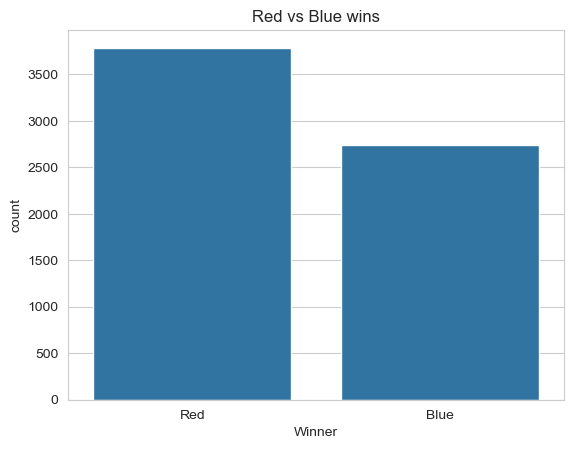

In [31]:
# 5. TARGET VARIABLE (Winner)
# ===============================
print("\nWinner distribution:")
print(df["Winner"].value_counts())

sns.countplot(data=df, x="Winner")
plt.title("Red vs Blue wins")
plt.show()

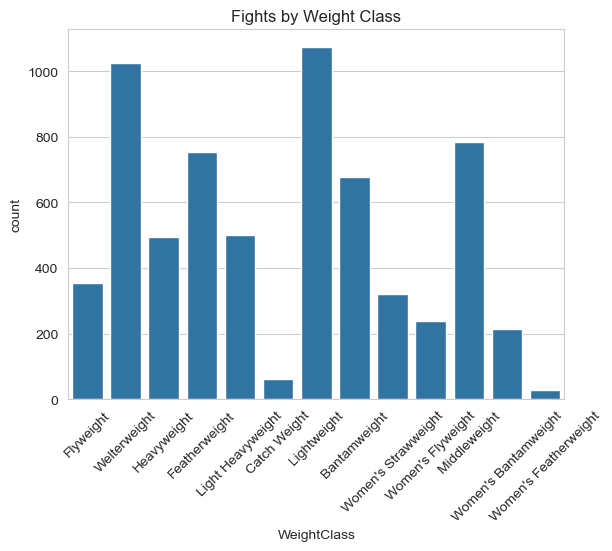

In [33]:
# 6. WEIGHT CLASS ANALYSIS
# ===============================
sns.countplot(data=df, x="WeightClass")
plt.title("Fights by Weight Class")
plt.xticks(rotation=45)
plt.show()


In [39]:
# 7. NUMERICAL FEATURES
# ===============================
num_features = [
    "RedAge", "BlueAge",
    "HeightDif", "ReachDif", "AgeDif", "WinStreakDif"
]

print("\nNumerical features summary:")
print(df[num_features].describe())


Numerical features summary:
            RedAge      BlueAge    HeightDif     ReachDif       AgeDif  \
count  6528.000000  6528.000000  6528.000000  6528.000000  6528.000000   
mean     30.359528    29.805607    -0.006679    -0.299271     0.096814   
std       4.180712     3.959623     6.770956     9.132413     5.201719   
min      18.000000    19.000000  -187.960000  -187.960000   -17.000000   
25%      27.000000    27.000000    -5.080000    -5.080000    -3.000000   
50%      30.000000    30.000000     0.000000     0.000000     0.000000   
75%      33.000000    32.000000     5.080000     5.080000     4.000000   
max      47.000000    47.000000    30.480000    30.480000    17.000000   

       WinStreakDif  
count   6528.000000  
mean      -0.143842  
std        1.874732  
min      -18.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max       10.000000  


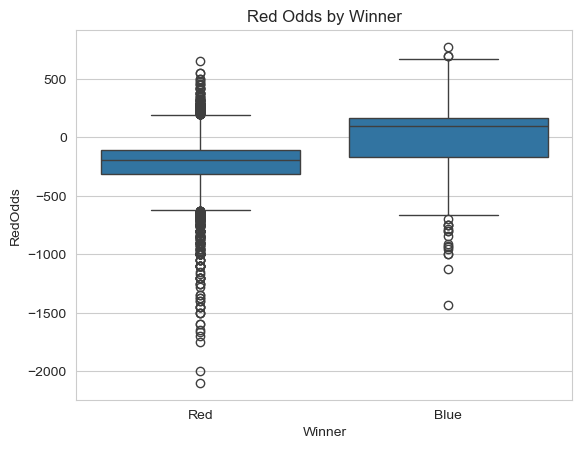

In [41]:
# 8. ODDS VS WINNER
# ===============================
sns.boxplot(data=df, x="Winner", y="RedOdds")
plt.title("Red Odds by Winner")
plt.show()


=== 8. FIGHT FINISHES ===
Finish
U-DEC         2404
KO/TKO        2009
SUB           1157
S-DEC          654
M-DEC           46
DQ              18
Overturned       2
Name: count, dtype: int64


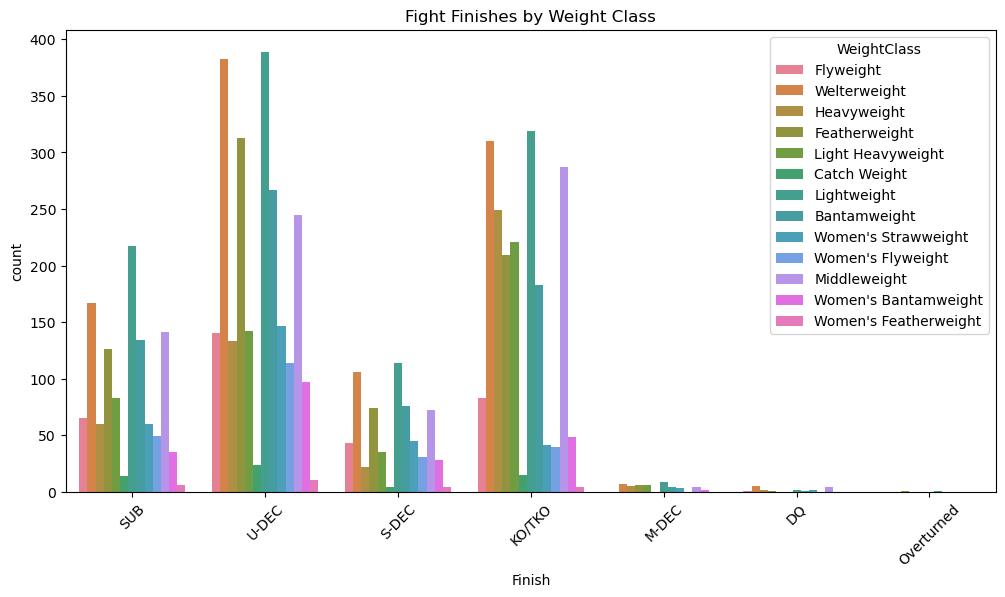

In [17]:
# 8. FIGHT OUTCOMES
# ===============================
print("\n=== 8. FIGHT FINISHES ===")
finish_counts = df['Finish'].value_counts()
print(finish_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Finish', hue='WeightClass')
plt.title('Fight Finishes by Weight Class')
plt.xticks(rotation=45)
plt.show()


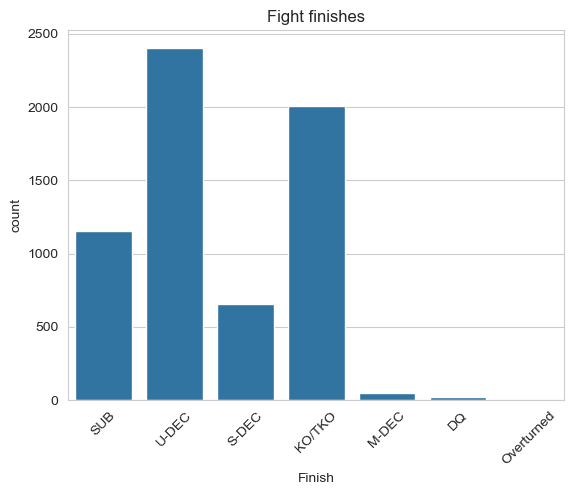

In [43]:
# 9. FIGHT OUTCOMES
# ===============================
sns.countplot(data=df, x="Finish")
plt.title("Fight finishes")
plt.xticks(rotation=45)
plt.show()


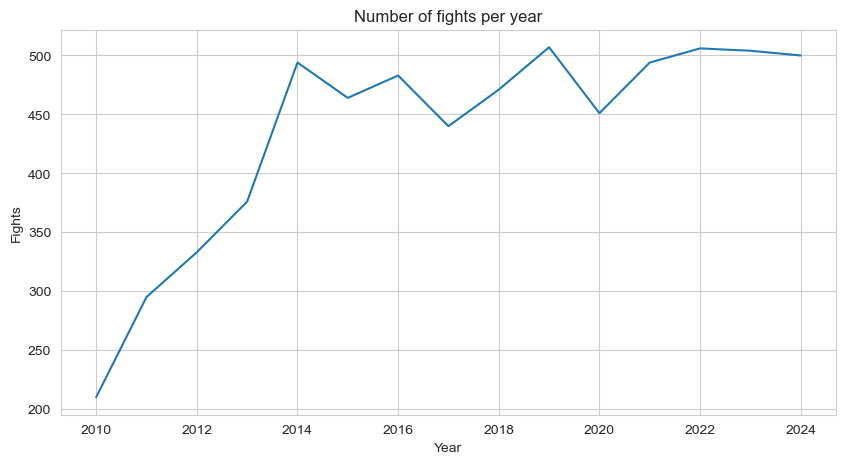


=== END OF EDA ===


In [45]:
# 10. TRENDS OVER TIME
# ===============================
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year

df.groupby("Year")["Winner"].count().plot(figsize=(10,5))
plt.title("Number of fights per year")
plt.ylabel("Fights")
plt.show()

print("\n=== END OF EDA ===")

In [47]:
print("\n=== 9. KEY INSIGHTS ===")
print("""
- Dataset Size: Large UFC fight dataset.
- Slight Red corner bias may exist.
- Strong predictors: Odds, WinStreakDif, AgeDif.
- Missing data mainly in rankings.
- Decisions dominate fight outcomes.
- Suitable for ML modeling (LogReg / XGBoost).
""")

print("\n=== END OF EDA ===")


=== 9. KEY INSIGHTS ===

- Dataset Size: Large UFC fight dataset.
- Slight Red corner bias may exist.
- Strong predictors: Odds, WinStreakDif, AgeDif.
- Missing data mainly in rankings.
- Decisions dominate fight outcomes.
- Suitable for ML modeling (LogReg / XGBoost).


=== END OF EDA ===
